<tr>
<td align="center">
 <div align="center">
   <font color="#21618C" size=8px>
   <b>Oasis Infobyte</b>
 <div align="center">       
   <font color="#21618C" size=5px>
   <b>Data Science Internship</b>
<td width="30%" align="center" > <img src="oasis logo.jfif"> 

<table align="left" style="margin-left: 40px;">
<td>
<font color="purple" size=6px >            
<b>Email Spam detection with Machine Learning</b>

## **Author:** Roshankumar S

## Predictive Modeling of Sales Based on Advertising Data
* ##### [1. Logistic Regression](#introduction)
* ##### [2. Problem Statement](#problem_statement)
* ##### [3. Objective](#objective)
* ##### [4. Dataset Description](#description)
* ##### [5. Data Dictionary](#dictionary)
* ##### [6. Prerequisite](#prerequisite)
* ##### [7. Understanding and summarizing dataset](#understanding)
* ##### [8. Data Visualization](#visualization)
* ##### [9. Data preparation](#preparation)
* ##### [10. Model developement](#model_developement)
* ##### [11. Model Evaluation](#evaluation)
* ##### [12. Conclusion](#conclusion)

<a id="introduction"><a>
## Logistic Regression
<p style='text-align: justify; text-indent: 30px;'>
Logistic Regression is a widely used statistical modeling technique for binary classification. It predicts the probability of an event occurring based on independent variables. By applying the logistic function to a linear combination of the predictors, it maps the outcome's probability between 0 and 1. Logistic regression is interpretable, efficient, and handles numerical and categorical predictors. It finds applications in various fields. However, it assumes linearity, independence of observations, and follows the logistic distribution. Assumptions should be assessed, and model performance evaluated.

<a id="problem_statement"><a>
## Problem Statement
<p style='text-align: justify;'> 
Develop a machine learning model that accurately identifies and classifies emails as either spam or non-spam (ham). The model should analyze the content and characteristics of emails to distinguish between legitimate and unwanted messages. By effectively detecting spam, the goal is to reduce the risk of users being exposed to malicious or unsolicited content, enhance email filtering systems, and improve overall email security and user experience.

<a id="objective"><a>
## Objective
<p style='text-align: justify;'> 
To develop a robust and accurate machine learning model for spam detection that effectively identifies and classifies emails as either spam or non-spam. The objective is to minimize false positives (misclassifying legitimate emails as spam) and false negatives (allowing spam emails to reach the inbox). By achieving a high level of precision and recall in spam detection, the goal is to enhance email filtering systems, improve user experience, and mitigate the risks associated with unsolicited and potentially malicious content.

<a id="description"><a>
## Dataset Description
<p style='text-align: justify;'>  
The dataset used for spam detection consists of labeled email samples that are classified as either spam or non-spam (ham). It includes the text content of the emails as the primary feature for classification. Each email is assigned a label indicating whether it is spam or non-spam. The dataset is prepared and pre-labeled for training and evaluating machine learning models for spam detection. The content of the emails serves as the main input for analysis, feature engineering, and model development.

<a id="dictionary"><a>
## Data Dictionary

**Email Content:** This feature represents the text content of the emails. It includes the body of the emails, subject lines, and any other relevant text information.

**Label/Class:** This feature indicates whether each email is classified as spam or non-spam (ham). It is a binary variable, with "spam" representing unwanted or unsolicited messages and "non-spam" representing legitimate emails.

<a id="prerequisite"><a>
## Prerequisite

### Import Libraries

In [1]:
# Import numpy to perform mathematical operations on the dataset
import numpy as np
# Import pandas for storing , retrieving and manipulating 2-dimensional data in the form of table
import pandas as pd
# Import matplotlib for visualization tools
import matplotlib.pyplot as plt
# Import seaborn for better visualization methods
import seaborn as sns
# Import train_test_split to split the dataset
from sklearn.model_selection import train_test_split
# Import TfidfVectorizer for vectorizing the text
from sklearn.feature_extraction.text import TfidfVectorizer
# Import Logistic Regression to develope a model
from sklearn.linear_model import LogisticRegression
# Import metrics to evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Import dataset

In [2]:
# Import data from csv file into data frame
data = pd.read_csv("spam.csv",encoding="ISO-8859-1")

# Select only the desired columns
data = data.iloc[:,:2]

# Assign proper column names to the attributes
data.columns = ["is_spam","text"]

<a id="understanding"><a>
## Understanding and summarizing dataset

In [3]:
# Display top 5 observations of the dataset
data.head()

,is_spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Check the shape of the dataset
print("Number of records and attributes : ",data.shape)

Number of records and attributes :  (5572, 2)


In [5]:
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   is_spam  5572 non-null   object
 1   text     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Get statistical data of the dataset 
data.describe(include=object)

,is_spam,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Check if null values are present in the dataset
data.isnull().sum()

is_spam    0
text       0
dtype: int64

In [8]:
# Check for duplicated records in the dataset
data.duplicated().sum()

403

<a id="visualization"><a>
## Data Visualization

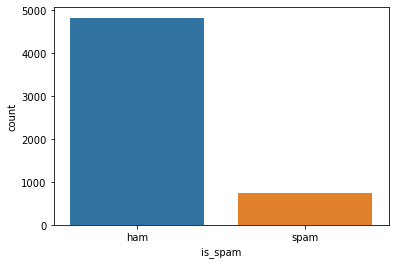

In [9]:
# Plot a count plot for each class
sns.countplot(x=data.is_spam)

# Display the plot
plt.show()

<a id="preparation"><a>
## Data Preparation

In [10]:
# Drop duplicate records
data.drop_duplicates(inplace=True)

### Encoding

In [11]:
# Dummy encode the categorical attribute using map function
data.is_spam = data.is_spam.map({"ham":0,"spam":1})

### Test Train split

In [12]:
# Independent attribute
X = data.text
# Target attribute
y = data.is_spam

In [13]:
# Perform train test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### TF-IDF Vectorization

In [14]:
# transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train = feature_extraction.fit_transform(X_train)
X_test = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

<a id="model_developement"><a>
## Model Developement

In [15]:
# Create a model using Logistic Regression
model = LogisticRegression()
# Fit the model using training data
model.fit(X_train,y_train)

LogisticRegression()

<a id="evaluation"><a>
## Model Evaluation

In [16]:
# Predict target class for train data
y_pred = model.predict(X_train)

# Display accuracy of prediction for training data
print("Metrics for Training data:")
print("Accuracy: ", accuracy_score(y_train,y_pred))
print("Precision:", precision_score(y_train,y_pred))
print("Recall:", recall_score(y_train,y_pred))
print("F1 Score:", f1_score(y_train,y_pred))

Metrics for Training data:
Accuracy:  0.9642079806529625
Precision: 0.9921465968586387
Recall: 0.7232824427480916
F1 Score: 0.8366445916114791


In [17]:
# Predict target class for test data
y_pred = model.predict(X_test)

# Display accuracy of prediction for training data
print("Metrics for Test data:")
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Metrics for Test data:
Accuracy:  0.9535783365570599
Precision: 0.9655172413793104
Recall: 0.6511627906976745
F1 Score: 0.7777777777777779


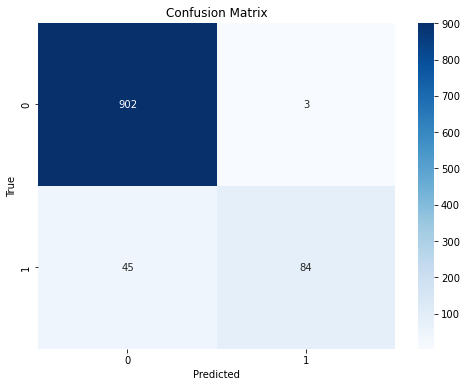

In [18]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a id="conclusion"><a>
## Conclusion

<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
In conclusion, after thorough analysis and implementation, this project successfully developed a spam mail detection system utilizing NLP techniques. The dataset underwent preprocessing steps including text cleaning, tokenization, and vectorization using the TfidfVectorizer. This allowed us to transform the textual data into a numerical representation suitable for training a logistic regression model.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
The trained model exhibited commendable performance, accurately classifying spam and non-spam emails. Evaluation metrics such as accuracy, precision, recall, and F1 score were utilized to assess the model's effectiveness. Additionally, visualizing the confusion matrix provided a comprehensive understanding of the model's predictions, including true positives, true negatives, false positives, and false negatives.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
The developed spam mail detection system has significant implications for enhancing email security and user experience. By effectively identifying and filtering out spam emails, it mitigates the risks associated with unsolicited and potentially harmful content. This contributes to maintaining a safer and more efficient email communication environment.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
Although the project achieved favorable results, there is always room for improvement. Further refinements and fine-tuning of the model can enhance its accuracy and robustness. Exploring alternative algorithms, feature engineering techniques, or advanced text processing methods could yield even better results.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
In summary, the developed spam mail detection system stands as a valuable tool in combating the persistent challenges of email spam. Its implementation contributes to a more secure and reliable email ecosystem, empowering users with enhanced protection against unwanted and malicious content.